## Number of OS, comparison of WT and Cpfl1 animals, plot over time

The number of OS between WT and Cpfl1 animals should be compared. Here, a bar plot will be computed comparing them between individual ages. Additionally, some functions were written to automatically annotate the signficant comparisons between WT and Cpfl1.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import sys
sys.path.append("../../")
from quapos_lm import asterics, significant_t_tests, x_coordinate_barplot

In [2]:
# Define path where measurements are stored
path = "../../measurements/cpfl/"

# Define path where plots should be stored
save_path = "../../plots-images/quapos-paper/figure-3-plots/"

In [3]:
# Load measurements
measurements = pd.read_csv(path + "08-features-processed.csv")
measurements

,image_id,age,maximum,mean,median,minimum,sigma,sum,variance,flatness,...,perimeter_2d_rescaled,major_axis_length_2d_rescaled,minor_axis_length_2d_rescaled,surface_area_rescaled,bbox_volume_rescaled,convex_volume_rescaled,volume_rescaled,label,genotype,summed_volume
0,0,8,435.323232,231.815654,215.544626,136.808081,67.478992,50966.181818,8476.601950,1.525459,...,6.422570,2.481628,1.372441,19.037570,17.155822,8.109028,5.670840,99,cpfl,563.030645
1,1,8,460.709677,224.380055,206.129242,126.634409,70.985109,56809.064516,8270.087836,1.629387,...,7.325543,2.841319,1.473626,24.355526,21.933224,10.160933,6.959598,93,cpfl,648.556847
2,2,8,510.370968,252.925858,232.679688,141.645161,81.942129,46226.919355,12177.344482,1.478168,...,5.670415,2.152691,1.295106,16.577307,13.719543,6.730957,4.823200,62,cpfl,300.083068
3,3,14,608.186207,293.062064,266.616379,157.948276,99.985899,94890.186207,16773.811155,1.415236,...,8.747193,3.531725,1.585332,27.055333,25.996121,12.821610,8.657550,290,cpfl,3659.193719
4,4,14,648.180556,298.264152,268.251157,154.018519,107.243126,104264.393519,18925.976599,1.424420,...,9.041931,3.524640,1.744031,27.524135,29.736536,13.434220,9.092604,216,cpfl,3710.954257
5,5,14,546.748148,272.073887,250.414280,153.170370,86.006519,84179.600000,11148.498631,1.464712,...,8.949500,3.568040,1.559667,27.394193,29.199424,13.371972,8.435550,135,cpfl,2371.852523
6,6,20,487.565517,243.963166,224.548761,130.993103,77.417826,106942.248276,9129.420382,1.488183,...,10.161918,3.974969,1.837445,36.029479,39.587794,18.379267,11.898974,145,cpfl,2115.038030
7,7,20,442.237805,228.048594,211.738281,126.243902,69.436005,77319.286585,6960.528745,1.612874,...,8.767230,3.694451,1.541159,28.744134,31.292334,13.436362,9.488528,164,cpfl,1804.643293
8,8,20,359.148387,191.621903,179.647253,108.348387,52.769600,78788.929032,4414.103336,1.477569,...,9.842299,3.811786,1.790636,33.458424,35.488406,17.097196,10.850190,155,cpfl,2869.171547
9,9,245,865.575758,368.635598,323.865057,173.484848,155.070912,157599.121212,41263.537517,1.235098,...,9.257627,3.302101,1.937421,27.561774,26.845265,14.834386,10.540409,33,cpfl,953.964241


### Compute significant t test results

The effect of the genotype will be compared to WT control animals at each age. The function takes the data from each age and compares the genotype with an independent t-test. The function is based on `t_test_ind` from the `scipy.stats` package.

In [4]:
# Define an array with the timepoints for comparison
ages = [8, 14, 20, 30, 70, 245]

# Compute significant t test results
significant_rows = significant_t_tests(dataframe=measurements, y="label", ages=ages)
significant_rows

,age,p_value
4,70,0.047701
5,245,0.014898


### Create a barplot to show effect of genotype over time

Now a barplot will be computed:

- mean value computed from the averages of the biological replicate
- standard error of the mean
- single datapoints (averages of the biological replicate)
- annotate significant results

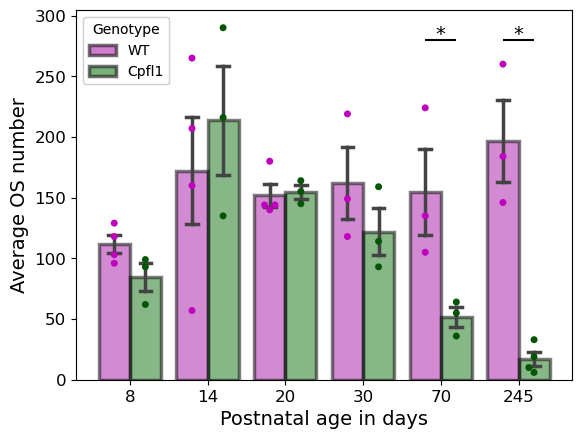

In [5]:
# Draw standard deviation, based on barplot
barplot = sns.barplot(data=measurements,
                      x="age",
                      y="label",
                      hue="genotype",
                      palette={"wt": "m", "cpfl": "g"},
                      alpha=0.5,
                      hue_order=["wt", "cpfl"],
                      capsize=0.3,
                      linewidth=2.5,
                      width=0.8,
                      errorbar=("se"),
                      edgecolor="#000000",
                      err_kws={"linewidth": 2.5, "color": "#434343"})

# Draw datapoints, based on stripplot
swarmplot = sns.swarmplot(data=measurements,
                          x="age",
                          y="label",
                          dodge=True,
                          hue="genotype",
                          palette={"wt": "m", "cpfl": "#025502"},
                          hue_order=["wt", "cpfl"])

# Define a y position for annotating t test results
y_coordinate = 280

# Annotate the significant results with plt.hlines
for index, row in significant_rows.iterrows():
    
    # Define x_coordinate for the star
    x_coordinate = x_coordinate_barplot(row=row, ages=ages)
    
    # Define the level of significance
    significance = asterics(row=row, column_name="p_value")
    
    # Draw the significance star(s) as well as a line at the appropriate position
    barplot.text(x_coordinate, y_coordinate, significance, fontsize=14, ha="center")
    barplot.hlines(y=y_coordinate, xmin=x_coordinate-0.2, xmax=x_coordinate+0.2, color="k")

# Adjust the legend of the plot
legend_labels = {"wt": "WT", "cpfl": "Cpfl1"}
handles, labels = barplot.get_legend_handles_labels()
custom_labels = [legend_labels[label] for label in labels]
bar_legend = plt.legend(handles[0:2], custom_labels[0:2], title='Genotype', loc='upper left')
plt.gca().add_artist(bar_legend)


# Adjust y-axis
plt.ylabel("Average OS number", fontsize=14)
plt.yticks(fontsize=12)

# Adjust x-axis
plt.xlabel("Postnatal age in days", fontsize=14)
plt.xticks(fontsize=12)

plt.savefig(save_path + "01-a-os-number-comparison.png",
            dpi=300,
            bbox_inches="tight")